<a href="https://colab.research.google.com/github/John260260/Deep_Learning/blob/main/PlantVillage_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS= 3
EPOCHS= 50

In [ ]:
dataset= tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/datasets/PlantVillage',shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)
# here data is collected from the source then shuffled and put it into 32 batches of 68 image each
# Image size is the pixel size whcih is 256*256 and same for every one else i will have to convert it into same size for eg:- 180*180

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
32*68

2176

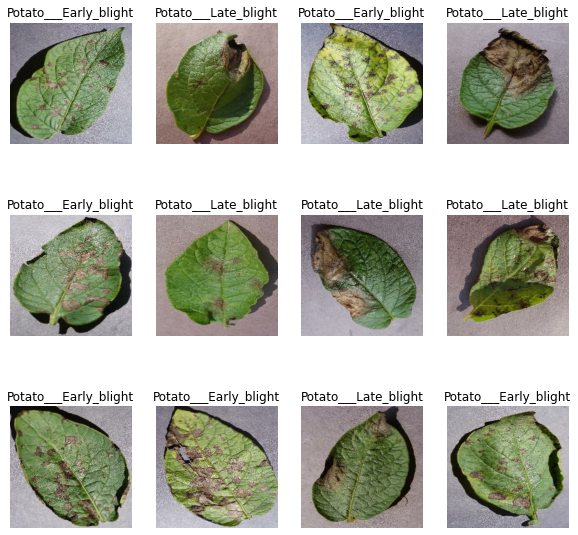

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):#dataset.take= calling dataset in batches
    for i in range(12):   
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8')) #dataset is in tensor so by doing .numpy we have converted it into np and then as type int helps for img show
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
''' 
80%==> training
20%==> 10% validation,10% test
'''

' \n80%==> training\n20%==> 10% validation,10% test\n'

In [ ]:
len(dataset)

68

In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds=dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds= test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split= 0.1, test_split= 0.1, shuffle= True, shuffle_size=10000):

    ds_size= len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)

    return train_ds,val_ds, test_ds


In [ ]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
                                        layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                                        layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation= tf.keras.Sequential([
                                        layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                        layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model= models.Sequential([
                          resize_and_rescale,
                          data_augmentation,
                          layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
54/54 [==============================] - 445s 230ms/step - loss: 0.8992 - accuracy: 0.4942 - val_loss: 0.8233 - val_accuracy: 0.6302
Epoch 2/50
54/54 [==============================] - 7s 126ms/step - loss: 0.6637 - accuracy: 0.7106 - val_loss: 0.5270 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 7s 126ms/step - loss: 0.3895 - accuracy: 0.8478 - val_loss: 0.2828 - val_accuracy: 0.9010
Epoch 4/50
54/54 [==============================] - 7s 126ms/step - loss: 0.3335 - accuracy: 0.8727 - val_loss: 0.4941 - val_accuracy: 0.7760
Epoch 5/50
54/54 [==============================] - 7s 125ms/step - loss: 0.2752 - accuracy: 0.8906 - val_loss: 0.4281 - val_accuracy: 0.8438
Epoch 6/50
54/54 [==============================] - 7s 125ms/step - loss: 0.2740 - accuracy: 0.8825 - val_loss: 0.1732 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 7s 125ms/step - loss: 0.2241 - accuracy: 0.9149 - val_loss: 0.1404 - val_accuracy: 0.9583
Epoc

In [ ]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 8s 54ms/step - loss: 0.0494 - accuracy: 0.9844


In [ ]:
scores

[0.04936303198337555, 0.984375]

In [ ]:
history

In [ ]:
history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

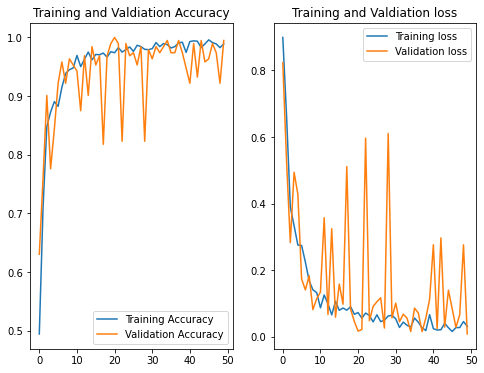

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Valdiation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Valdiation loss')
plt.show()

In [ ]:
import numpy as np

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


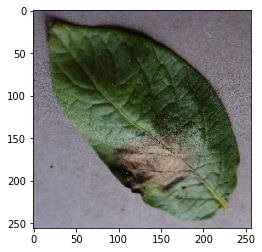

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

  first_image= images_batch[0].numpy().astype('uint8')
  fist_label=labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print('actual label:', class_names[fist_label])

  batch_prediction= model.predict(images_batch)
  print('predicted label:', class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence= round(100* (np.max(predictions[0])),2)
  return predicted_class, confidence

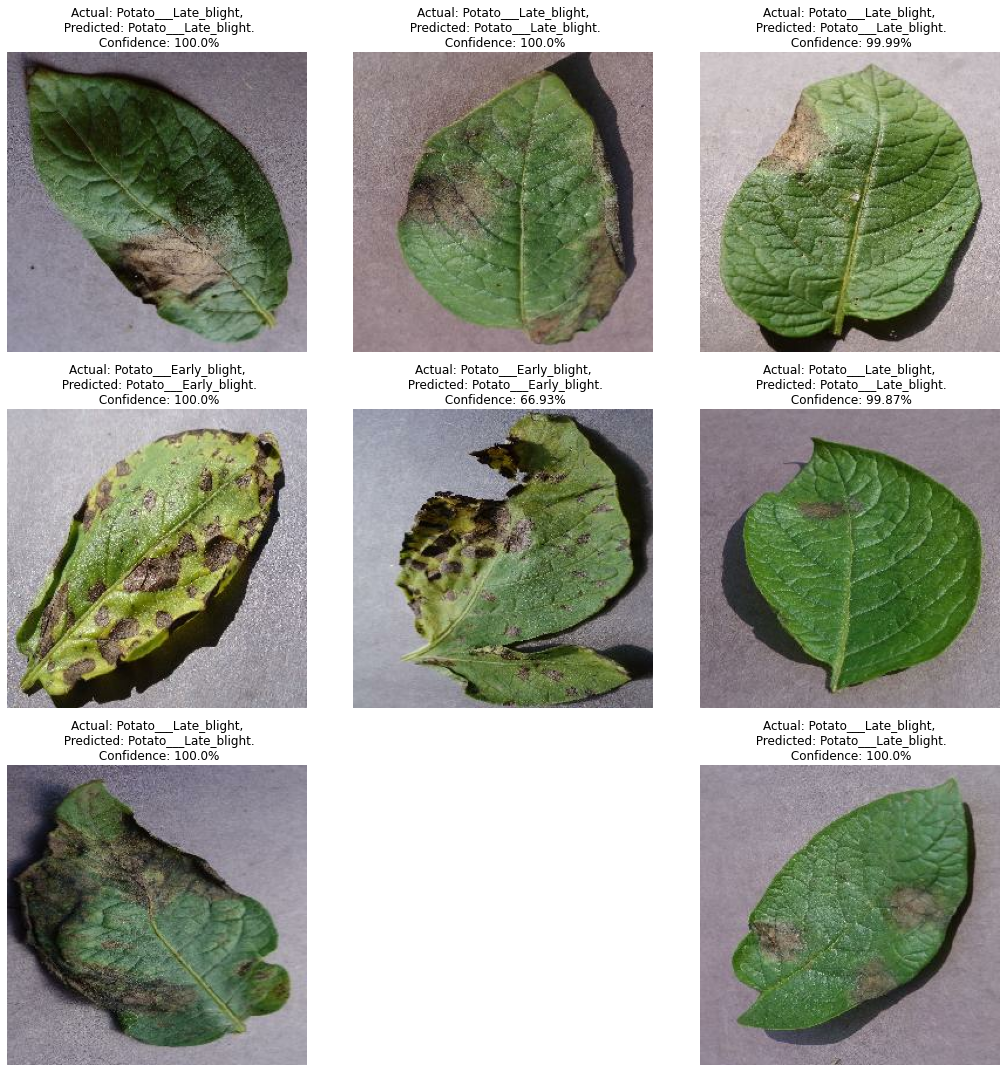

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(0,9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis('off')
        plt.tight_layout()